<a href="https://colab.research.google.com/github/alejandrobergasa/Sentiment-Analysis/blob/main/Sentiment_Analysis_VaderVSRoberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Carga de el dataset

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger') 
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv('Reviews2.csv')

In [ ]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


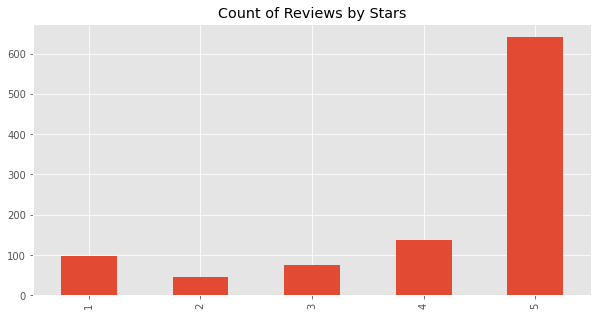

In [ ]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))

In [ ]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


###Utilizando VADER

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am feeling good today')

{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.5267}

In [ ]:
sia.polarity_scores('This shit is the worst')

{'neg': 0.72, 'neu': 0.28, 'pos': 0.0, 'compound': -0.8271}

In [ ]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [ ]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Text(0.5, 1.0, 'Compound score by Amazon Star Review')

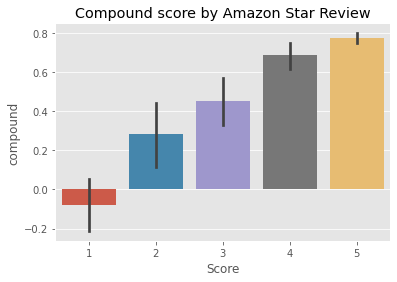

In [ ]:
# Plot de los resultados de VADER
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound score by Amazon Star Review')

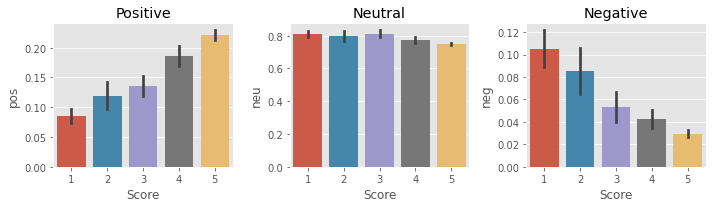

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

###Utilizando *Roberta*

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# Recordamos los resultados de VADER sobre example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Probamos con el modelo Roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687476, 'roberta_pos': 0.0029573715}


In [ ]:
# Definimos una función para utilizar cómodamente el modelo
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value

        roberta_result = polarity_scores_roberta(text)

        both = {**vader_result_rename, **roberta_result}

        res[myid] = both
    
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/999 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [ ]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns={'index': 'Id'})
results = results.merge(df, how='left')

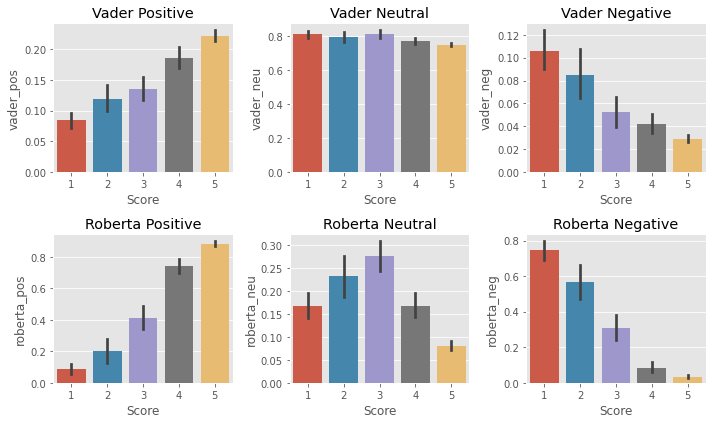

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data=results, x='Score', y='vader_pos', ax=axs[0][0])
sns.barplot(data=results, x='Score', y='vader_neu', ax=axs[0][1])
sns.barplot(data=results, x='Score', y='vader_neg', ax=axs[0][2])
sns.barplot(data=results, x='Score', y='roberta_pos', ax=axs[1][0])
sns.barplot(data=results, x='Score', y='roberta_neu', ax=axs[1][1])
sns.barplot(data=results, x='Score', y='roberta_neg', ax=axs[1][2])
axs[0][0].set_title('Vader Positive')
axs[0][1].set_title('Vader Neutral')
axs[0][2].set_title('Vader Negative')
axs[1][0].set_title('Roberta Positive')
axs[1][1].set_title('Roberta Neutral')
axs[1][2].set_title('Roberta Negative')
plt.tight_layout()
plt.show()

In [ ]:
results.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

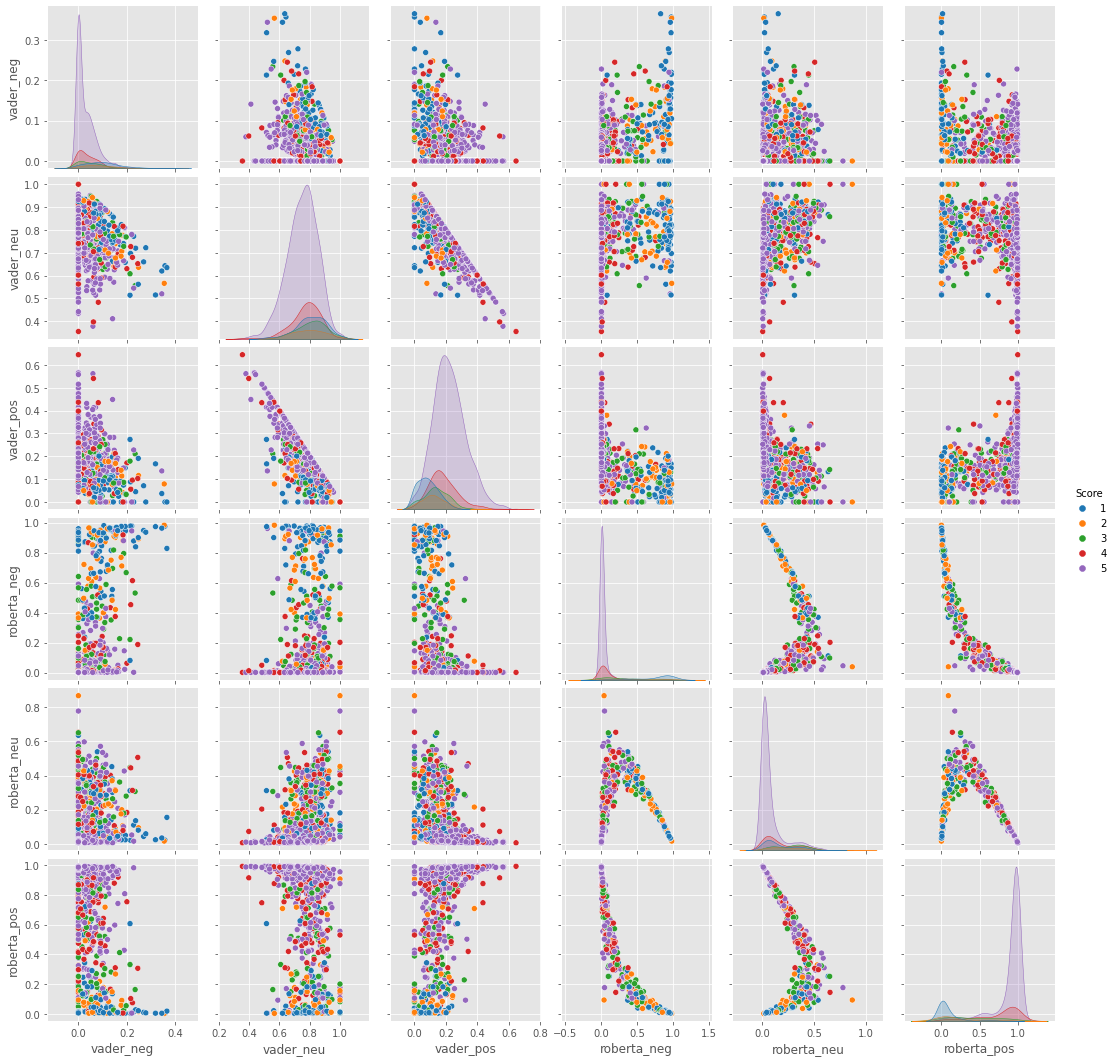

In [ ]:
sns.pairplot(data=results, 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [ ]:
results.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [ ]:
results.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
results.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
results.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
colors = {
    '1': 'Blues', 
    '2': 'Blues',
    '3': 'Blues',
    '4': 'Blues',
    '5': 'Blues'
}
def colorDot(score):
    return colors[score]

In [ ]:
plt.xlabel = 'Roberta_neg'
plt.ylabel = 'Vader_neg'
plt.scatter(results['roberta_neg'], results['vader_neg'], c=results['Score'], cmap='RdYlGn', s=8)
plt.colorbar()
plt.title('Negative value')
plt.show()

In [ ]:
plt.xlabel = 'Roberta_neu'
plt.ylabel = 'Vader_neu'
plt.scatter(results['roberta_neu'], results['vader_neu'], c=results['Score'], cmap='RdYlGn', s=8)
plt.colorbar()
plt.title('Neutral value')
plt.show()

In [ ]:
plt.xlabel = 'Roberta_pos'
plt.ylabel = 'Vader_pos'
plt.scatter(results['roberta_pos'], results['vader_pos'], c=results['Score'], cmap='RdYlGn', s=8)
plt.colorbar()
plt.title('Positive value')
plt.show()

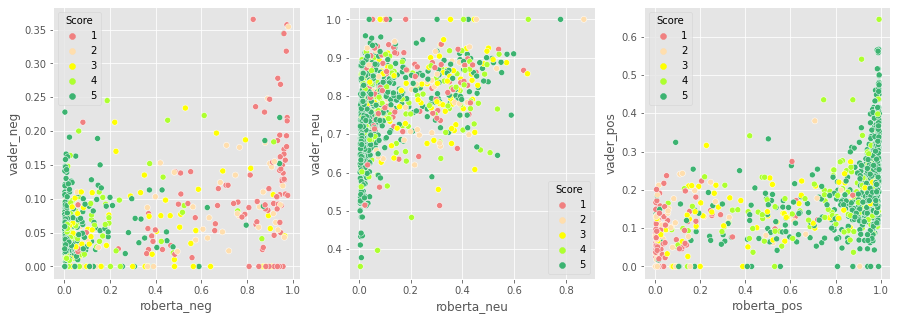

In [ ]:
colors = {
    1: 'lightcoral', 
    2: 'navajowhite',
    3: 'yellow',
    4: 'greenyellow',
    5: 'mediumseagreen'
}
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=results, x='roberta_neg', y='vader_neg', hue='Score', legend='brief', palette=colors, ax=axs[0])
sns.scatterplot(data=results, x='roberta_neu', y='vader_neu', hue='Score', legend='brief', palette=colors, ax=axs[1])
sns.scatterplot(data=results, x='roberta_pos', y='vader_pos', hue='Score', legend='brief', palette=colors, ax=axs[2])

In [ ]:
# Probamos con el modelo Roberta
def roberta_values(frase):
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    print(frase)
    plt.bar(range(len(scores_dict)), list(scores_dict.values()), align='center')
    plt.xticks(range(len(scores_dict)), list(scores_dict.keys()))
    plt.show()

Regulate Ai NOW, protect women against having their likenesses stolen for deepfake pornography, protect the public from having medical information scraped, protect artists from being stolen and scraped from, protect writers and journalists from BOT news. Unacceptable


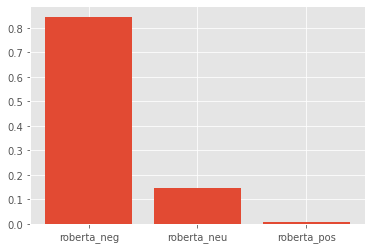

In [ ]:
roberta_values(frase = 'Regulate Ai NOW, protect women against having their likenesses stolen for deepfake pornography, protect the public from having medical information scraped, protect artists from being stolen and scraped from, protect writers and journalists from BOT news. Unacceptable')

This is the best place to see what’s happening in your world. Find some people and topics to follow now.


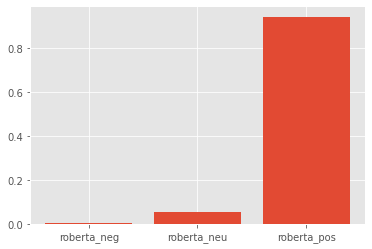

In [ ]:
roberta_values('This is the best place to see what’s happening in your world. Find some people and topics to follow now.')